In [25]:
!pip install opendatasets

In [8]:
import opendatasets as od

In [9]:
od.download("https://www.kaggle.com/datasets/harshalhonde/monthly-food-price-inflation-estimates-by-country")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chitikelaanitha123
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 47.0k/47.0k [00:00<00:00, 206kB/s]

In [16]:
import os

In [19]:
os.listdir('.\monthly-food-price-inflation-estimates-by-country')

['WLD_RTFP_country_2023-07-31.csv']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
food_df=pd.read_csv('WLD_RTFP_country_2023-07-31.csv')
print(food_df.head(200))





     Open  High   Low  Close  Inflation      country ISO3        date
0    0.53  0.54  0.53   0.53        NaN  Afghanistan  AFG  2007-01-01
1    0.53  0.54  0.53   0.53        NaN  Afghanistan  AFG  2007-02-01
2    0.54  0.54  0.53   0.53        NaN  Afghanistan  AFG  2007-03-01
3    0.53  0.55  0.53   0.55        NaN  Afghanistan  AFG  2007-04-01
4    0.56  0.57  0.55   0.57        NaN  Afghanistan  AFG  2007-05-01
..    ...   ...   ...    ...        ...          ...  ...         ...
195  1.50  1.52  1.48   1.49       7.92  Afghanistan  AFG  2023-04-01
196  1.47  1.48  1.45   1.47       4.15  Afghanistan  AFG  2023-05-01
197  1.47  1.48  1.45   1.46      -1.22  Afghanistan  AFG  2023-06-01
198  1.44  1.45  1.42   1.43      -3.74  Afghanistan  AFG  2023-07-01
199  0.55  0.57  0.54   0.55        NaN      Burundi  BDI  2007-01-01

[200 rows x 8 columns]


In [7]:
size=np.shape(food_df)
size



(4723, 8)

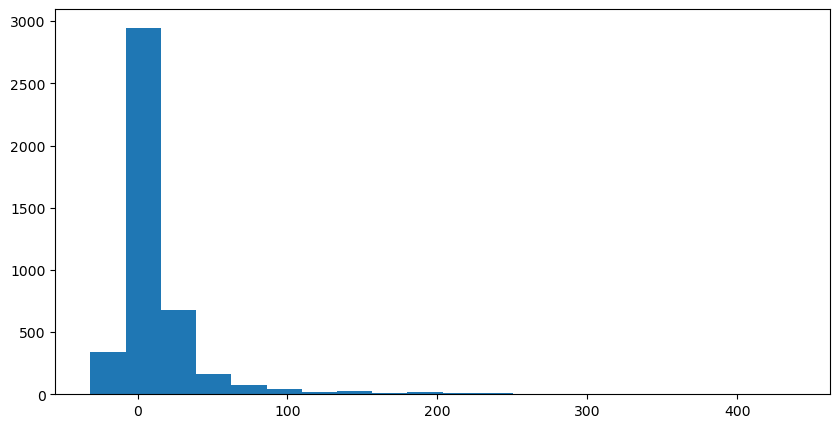

In [8]:
Inflation=food_df["Inflation"]
plt.figure(figsize=(10,5))
plt.hist(Inflation,bins=20)
plt.show()

In [62]:
od.download("https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset")

Skipping, found downloaded files in ".\diabetes-dataset" (use force=True to force download)


In [72]:
os.listdir()

['.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.kaggle',
 '.matplotlib',
 '3D Objects',
 'anaconda3',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop',
 'diabetes-dataset',
 'diabetes.csv',
 'Documents',
 'Downloads',
 'Favorites',
 'Links',
 'Local Settings',
 'monthly-food-price-inflation-estimates-by-country',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{089dd711-1d38-11ee-94ce-00155d002201}.TM.blf',
 'NTUSER.DAT{089dd711-1d38-11ee-94ce-00155d002201}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{089dd711-1d38-11ee-94ce-00155d002201}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'TASK2.ipynb',
 'Templates',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Videos',
 'WLD_RTFP_country_2023-07-31.csv']

In [15]:
dia_df=pd.read_csv("diabetes.csv")
print(dia_df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [59]:
x=dia_df.drop("Outcome",axis=1)
y=dia_df["Outcome"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
print("Scaled data:\n", X_scaled)



Scaled data:
 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [61]:
X_scaled[:,2].mean()

1.5034270125132327e-17

In [20]:
X_scaled[:,2].std()

1.0

In [22]:
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
dia_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [25]:
dia_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [27]:
X=dia_df.iloc[:,[1,2]]
y=dia_df.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)
X_train.head()


,Glucose,BloodPressure
243,119,50
252,90,80
520,68,70
536,105,90
621,92,76


In [28]:
scaler=MinMaxScaler().fit(X_train)


array([[0.59798995, 0.40983607],
       [0.45226131, 0.6557377 ],
       [0.34170854, 0.57377049],
       ...,
       [0.47738693, 0.69672131],
       [0.79396985, 0.57377049],
       [0.70351759, 0.60655738]])

In [30]:
scaler.data_min_

array([0., 0.])

In [32]:
scaler.data_max_

array([199., 122.])

In [34]:
X_train.describe()

,Glucose,BloodPressure
count,576.000000,576.000000
mean,121.060764,69.157986
std,32.311874,19.601447
min,0.000000,0.000000
25%,99.000000,64.000000
50%,117.000000,72.000000
75%,141.000000,80.000000
max,199.000000,122.000000


In [35]:
X_train_scaled=scaler.transform(X_train)
X_train_scaled

array([[0.59798995, 0.40983607],
       [0.45226131, 0.6557377 ],
       [0.34170854, 0.57377049],
       ...,
       [0.47738693, 0.69672131],
       [0.79396985, 0.57377049],
       [0.70351759, 0.60655738]])

In [36]:
scaler=MinMaxScaler().fit(X_test)


array([[0.44285714, 0.38596491],
       [0.99285714, 0.66666667],
       [0.43571429, 0.50877193],
       [0.42142857, 0.61403509],
       [0.28571429, 0.52631579],
       [0.37857143, 0.80701754],
       [0.3       , 0.61403509],
       [0.47857143, 0.63157895],
       [0.63571429, 0.49122807],
       [0.67142857, 0.78947368],
       [0.11428571, 0.52631579],
       [0.15714286, 0.70175439],
       [0.31428571, 0.54385965],
       [0.05714286, 0.63157895],
       [0.23571429, 0.68421053],
       [0.17857143, 0.45614035],
       [0.87142857, 0.43859649],
       [0.57857143, 0.71929825],
       [0.50714286, 0.61403509],
       [0.37142857, 0.77192982],
       [0.82857143, 0.68421053],
       [0.25714286, 0.49122807],
       [0.32857143, 0.57894737],
       [0.12857143, 0.71929825],
       [0.19285714, 0.59649123],
       [0.40714286, 0.70175439],
       [0.61428571, 0.73684211],
       [0.4       , 0.56140351],
       [0.41428571, 0.        ],
       [1.        , 0.64912281],
       [0.

In [38]:
scaler.data_min_

array([57.,  0.])

In [40]:
scaler.data_max_

array([197., 114.])

In [41]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[0.44285714, 0.38596491],
       [0.99285714, 0.66666667],
       [0.43571429, 0.50877193],
       [0.42142857, 0.61403509],
       [0.28571429, 0.52631579],
       [0.37857143, 0.80701754],
       [0.3       , 0.61403509],
       [0.47857143, 0.63157895],
       [0.63571429, 0.49122807],
       [0.67142857, 0.78947368],
       [0.11428571, 0.52631579],
       [0.15714286, 0.70175439],
       [0.31428571, 0.54385965],
       [0.05714286, 0.63157895],
       [0.23571429, 0.68421053],
       [0.17857143, 0.45614035],
       [0.87142857, 0.43859649],
       [0.57857143, 0.71929825],
       [0.50714286, 0.61403509],
       [0.37142857, 0.77192982],
       [0.82857143, 0.68421053],
       [0.25714286, 0.49122807],
       [0.32857143, 0.57894737],
       [0.12857143, 0.71929825],
       [0.19285714, 0.59649123],
       [0.40714286, 0.70175439],
       [0.61428571, 0.73684211],
       [0.4       , 0.56140351],
       [0.41428571, 0.        ],
       [1.        , 0.64912281],
       [0.

In [116]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

 

# Make predictions on the scaled testing data
y_pred_scaled = model.predict(X_test_scaled)

 

# Calculate Mean Squared Error (MSE) for scaled predictions
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

 

print("Mean Squared Error (scaled):", mse_scaled)

 

Mean Squared Error (scaled): 44.21458380988408


In [42]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
y_pred_scaled


array([27.99867002, 36.71742541, 29.62591126, 30.94862682, 28.54323081,
       33.22647741, 29.87669479, 31.69453628, 31.14997549, 35.57025436,
       27.02991501, 29.82295263, 29.03692098, 27.97430162, 30.27508484,
       26.63152497, 32.50637211, 33.78465817, 31.70528472, 32.68048085,
       35.5086353 , 27.80806978, 29.64597236, 29.8122042 , 28.68940155,
       32.0298715 , 34.34140316, 30.03504974, 22.43409164, 36.53900937,
       31.65154255, 29.29988871, 29.75058515, 22.68631094, 31.44231698,
       30.31807857, 31.27464937, 30.64266536, 31.93457138, 29.47830475,
       32.76503254, 30.19340469, 31.66085522, 22.43409164, 33.42639031,
       28.8155112 , 37.22042824, 31.99762621, 31.0854849 , 29.83370107,
       33.96307421, 30.328827  , 31.87295233, 30.55954944, 29.46755632,
       35.00276094, 31.23165565, 34.16298712, 26.51616375, 29.16159486,
       33.06955823, 29.17377906, 30.65484956, 36.84209929, 31.37138527,
       31.83139437, 31.92525872, 32.37882669, 32.16816536, 29.80

In [54]:
from sklearn.preprocessing import normalize

In [58]:
normalize_training_data=normalize(X_train,norm='l2')
normalize_training_data

array([[0.92192678, 0.38736419],
       [0.74740932, 0.66436384],
       [0.69678568, 0.71727938],
       ...,
       [0.74524131, 0.66679486],
       [0.91428817, 0.40506438],
       [0.88409494, 0.46730733]])